In [1]:
# %load withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

import seaborn as sns
# Apply the default theme
sns.set_theme()

df = pd.read_csv("../../data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float('nan')])

def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert(np.sum(activations) == row.number_activations or row.error)
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d['attacker_compute'] = rcompute[0]
    d['attacker_relative_activations'] = ractivations[0]
    d['attacker_relative_reward'] = rreward[0]
    d['attacker_gain'] = rreward[0] - ractivations[0]
    d['attacker_reward'] = reward[0]
    return d

df=df.join(df.apply(expand, axis=1, result_type='expand'))

In [2]:
d = df[df.protocol == "george"]
d = d[(d.incentive_scheme == 'constant') | (d.incentive_scheme == 'discount')]
d.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'strategy', 'strategy_description',
       'reward', 'machine_duration_s', 'error', 'attacker_compute',
       'attacker_relative_activations', 'attacker_relative_reward',
       'attacker_gain', 'attacker_reward'],
      dtype='object')

In [3]:
d.pivot(index=['attacker_compute', 'k'], columns=['strategy', 'incentive_scheme'], values='attacker_relative_reward')

strategy             private-override-block            \
incentive_scheme                   constant  discount   
attacker_compute k                                      
0.10             1                 0.034978  0.034978   
                 2                 0.024510  0.024510   
                 4                 0.016164  0.015469   
                 8                 0.012771  0.011889   
                 16                0.013070  0.012044   
                 32                0.016173  0.014915   
                 64                0.025024  0.023355   
                 128               0.043011  0.040807   
0.20             1                 0.126078  0.126078   
                 2                 0.103224  0.103224   
                 4                 0.082634  0.078525   
                 8                 0.079197  0.071428   
                 16                0.091641  0.081099   
                 32                0.127471  0.115332   
                 64                0.178840  0.169648   
                 128               0.217500  0.213884   
0.25             1                 0.187317  0.187317   
                 2                 0.163508  0.163508   
                 4                 0.139244  0.132779   
                 8                 0.139599  0.125443   
                 16                0.166921  0.147158   
                 32                0.222424  0.203042   
                 64                0.281809  0.272289   
                 128               0.306294  0.302373   
0.33             1                 0.304095  0.304095   
                 2                 0.280374  0.280374   
                 4                 0.261083  0.251825   
                 8                 0.283586  0.260523   
                 16                0.347098  0.317743   
                 32                0.422141  0.405391   
                 64                0.459828  0.453661   
                 128               0.476640  0.474283   
0.40             1                 0.423242  0.423242   
                 2                 0.401621  0.401621   
                 4                 0.391827  0.382970   
                 8                 0.450530  0.431130   
                 16                0.557360  0.550452   
                 32                0.628429  0.639217   
                 64                0.653167  0.662882   
                 128               0.660563  0.666099   
0.45             1                 0.517847  0.517847   
                 2                 0.499117  0.499117   
                 4                 0.494856  0.488045   
                 8                 0.579960  0.572104   
                 16                0.692296  0.706441   
                 32                0.758104  0.777580   
                 64                0.790158  0.801893   
                 128               0.809168  0.815025   
0.50             1                 0.616942  0.616942   
                 2                 0.602750  0.602750   
                 4                 0.603590  0.600440   
                 8                 0.689364  0.694009   
                 16                0.776062  0.798796   
                 32                0.816379  0.840968   
                 64                0.837192  0.861831   
                 128               0.852262  0.876942   

strategy             private-override-catchup           private-release-block  \
incentive_scheme                     constant  discount              constant   
attacker_compute k                                                              
0.10             1                   0.035748  0.035748              0.093570   
                 2                   0.007761  0.007761              0.063714   
                 4                   0.000590  0.000573              0.042421   
                 8                   0.000000  0.000000              0.032977   
                 16                  0.000000  0.000000              

<IPython.core.display.Javascript object>


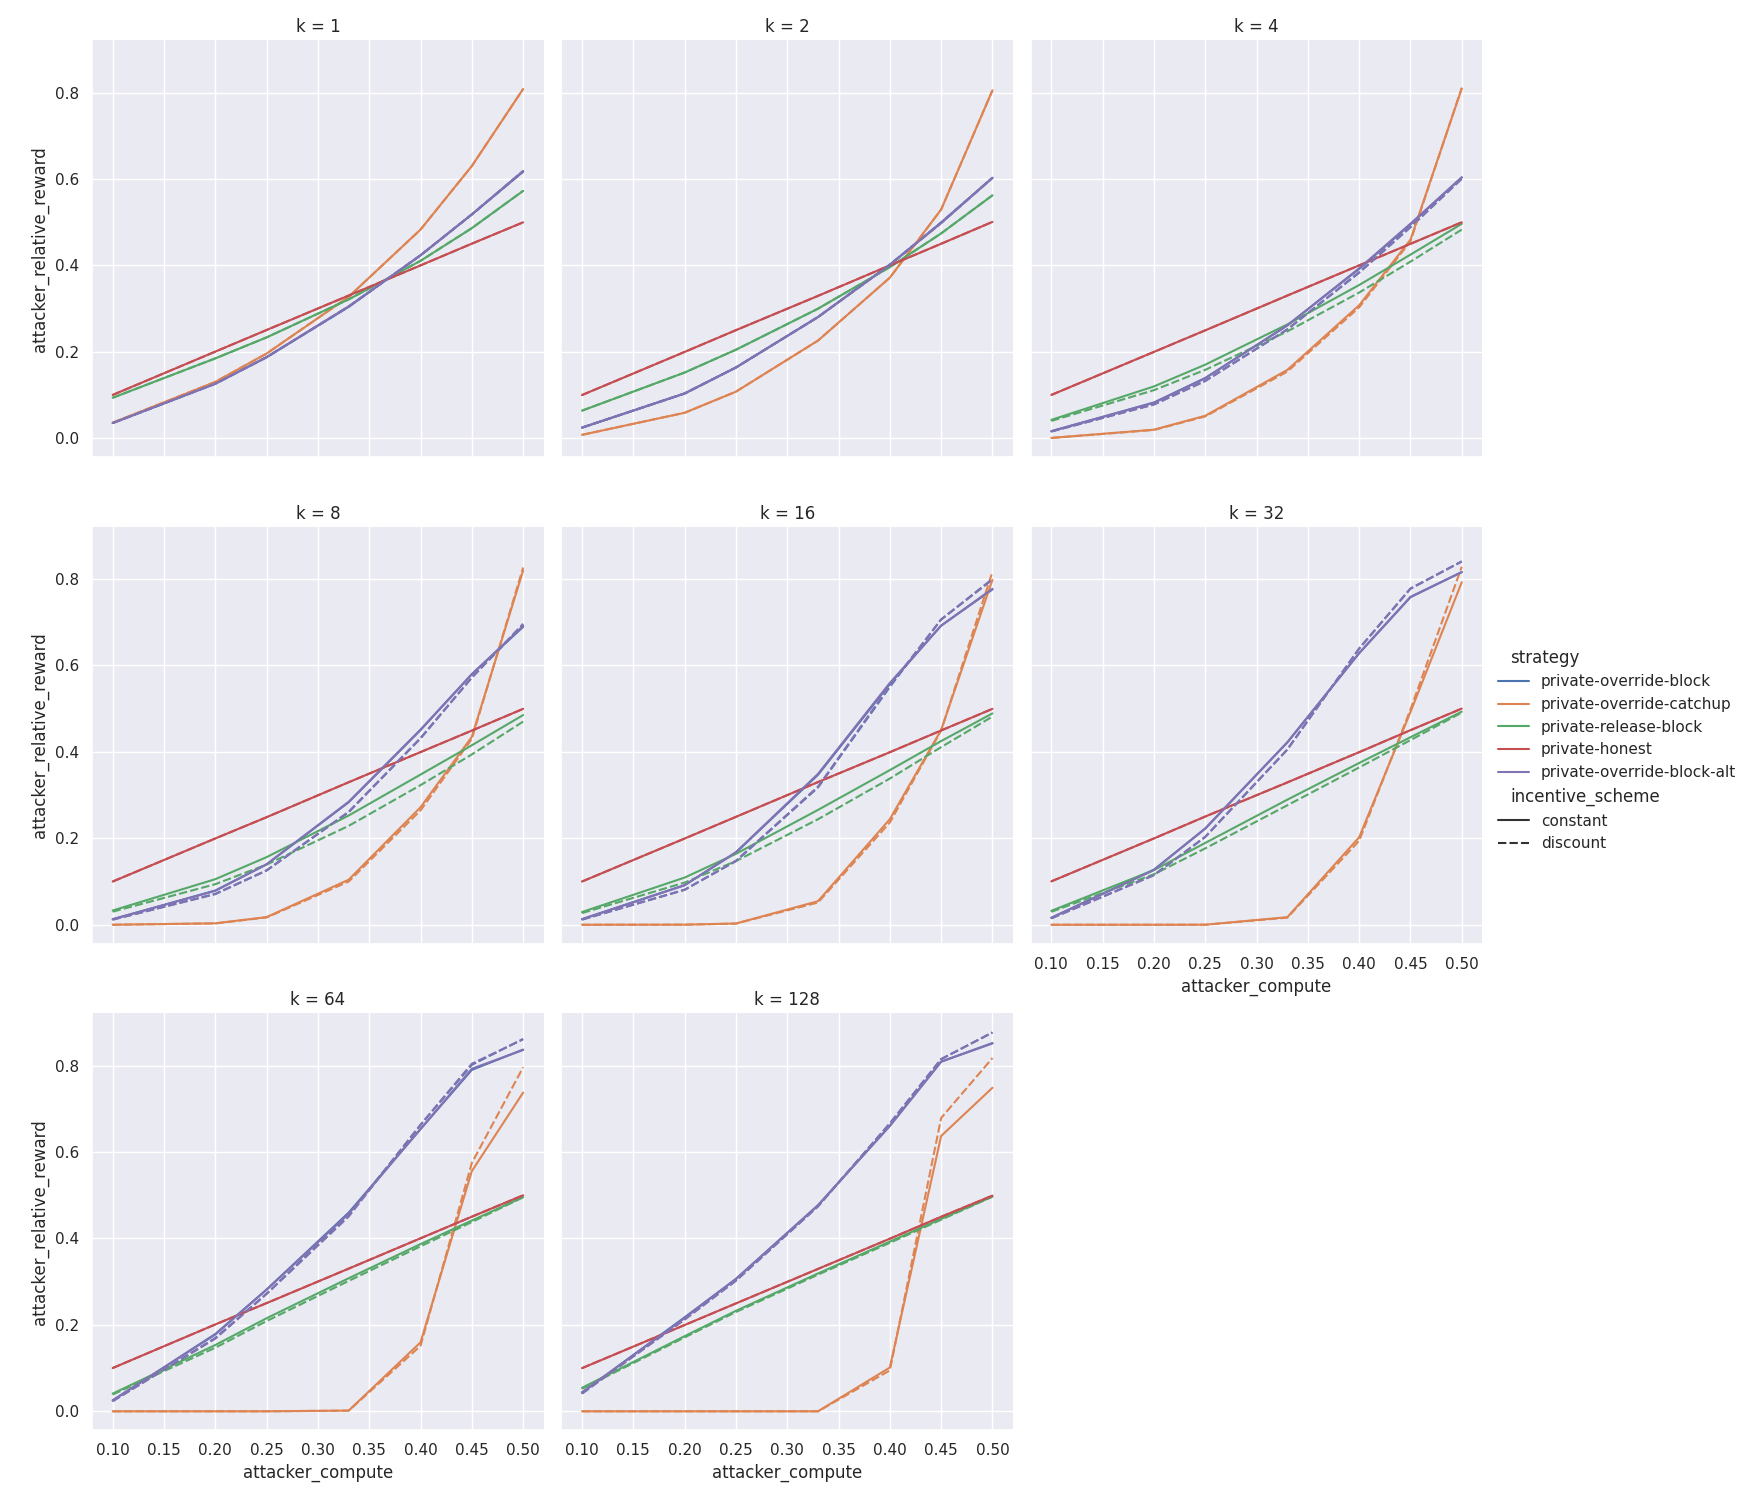

In [4]:
ax = sns.relplot(
    data=d,
    x="attacker_compute", y="attacker_relative_reward", col="k", col_wrap=3,
    hue="strategy", style="incentive_scheme", kind="line",
)

<IPython.core.display.Javascript object>


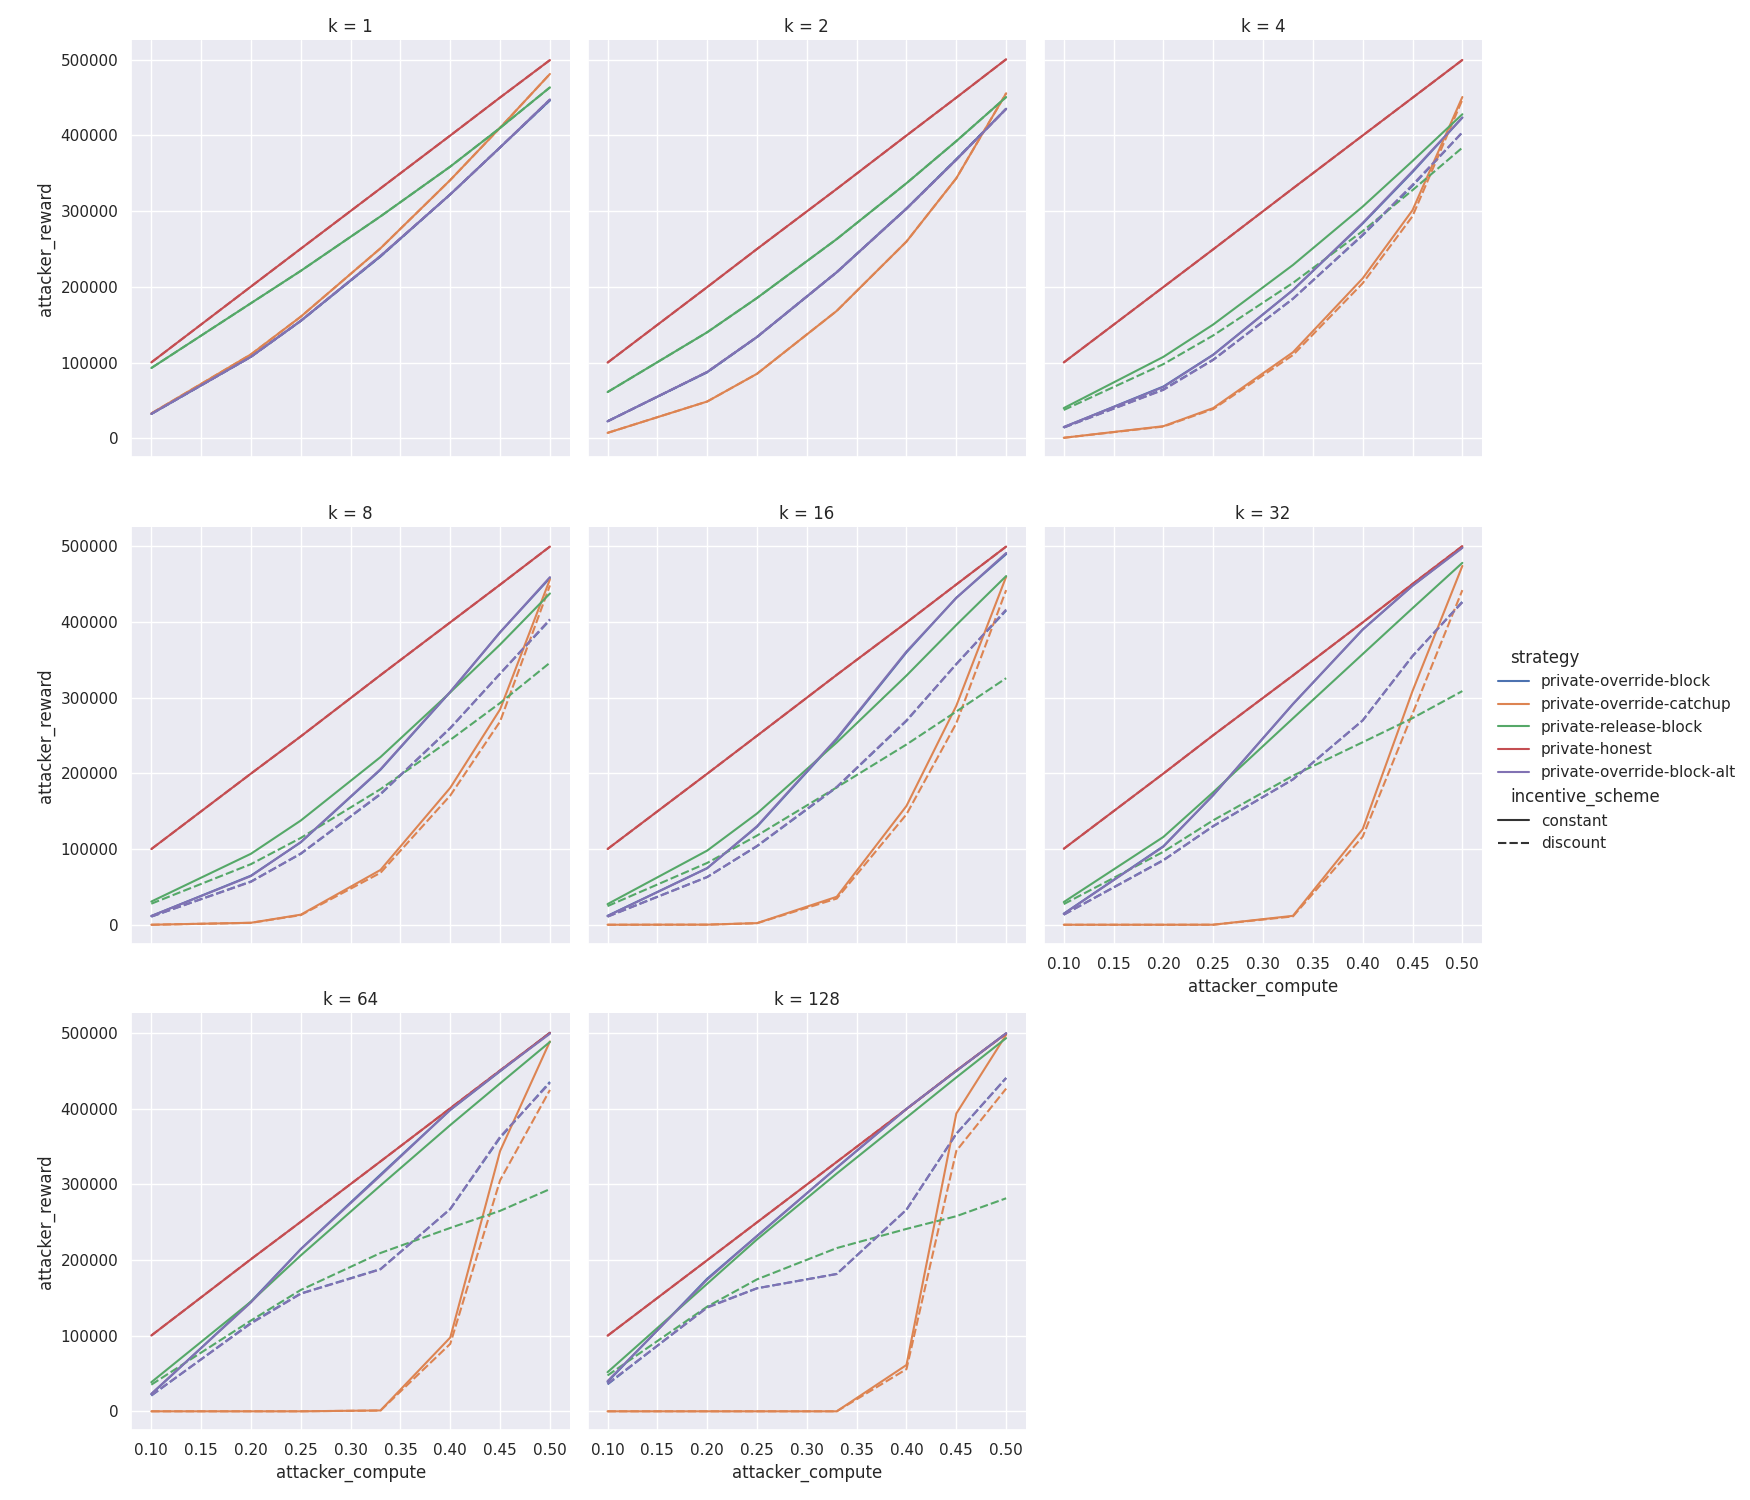

In [5]:
ax = sns.relplot(
    data=d,
    x="attacker_compute", y="attacker_reward", col="k", col_wrap=3,
    hue="strategy", style="incentive_scheme", kind="line",
)

<IPython.core.display.Javascript object>


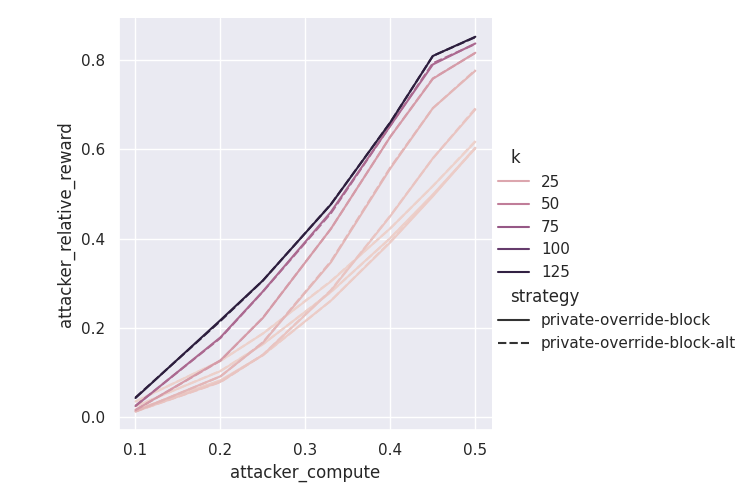

In [6]:
# does numerical implementation line up with non-numerical implementation of policiy?
dd = d
dd = dd[(dd['strategy']=='private-override-block') | (dd['strategy']=='private-override-block-alt')]
dd = dd[(dd['incentive_scheme']=='constant')]
sns.relplot(
    data=dd,
    x="attacker_compute", y="attacker_relative_reward", hue="k",
    style="strategy", kind="line",
)
# It does line up!